In [40]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.tsa.stattools import adfuller

data = pd.read_csv('./data/airline-passengers.csv')
data['Month'] = pd.to_datetime(data['Month'])
print(data)
data.set_index('Month', inplace = True)
print(data)

         Month  Passengers
0   1949-01-01         112
1   1949-02-01         118
2   1949-03-01         132
3   1949-04-01         129
4   1949-05-01         121
..         ...         ...
139 1960-08-01         606
140 1960-09-01         508
141 1960-10-01         461
142 1960-11-01         390
143 1960-12-01         432

[144 rows x 2 columns]
            Passengers
Month                 
1949-01-01         112
1949-02-01         118
1949-03-01         132
1949-04-01         129
1949-05-01         121
...                ...
1960-08-01         606
1960-09-01         508
1960-10-01         461
1960-11-01         390
1960-12-01         432

[144 rows x 1 columns]


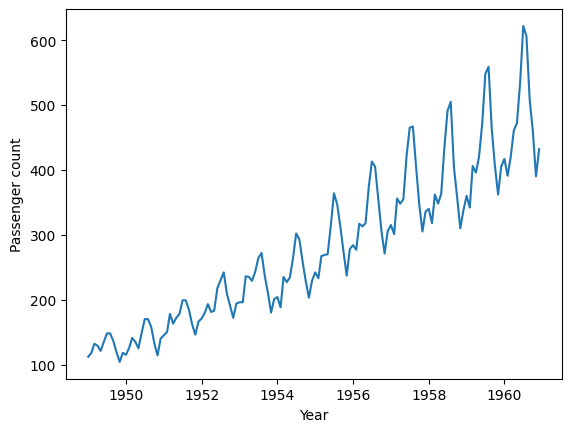

In [41]:
plt.plot(data)
plt.xlabel('Year')
plt.ylabel('Passenger count')
plt.show()

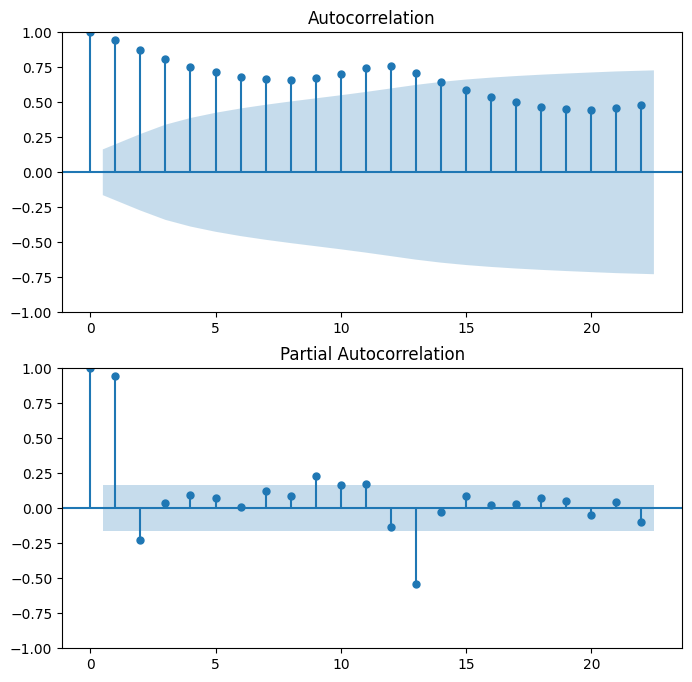

In [42]:
fig, (ax1, ax2) = plt.subplots(2, 1, figsize = (8, 8))
plot_acf(data, ax = ax1)
plot_pacf(data, ax = ax2)
plt.show()

In [43]:
result = adfuller(data['Passengers'])

print('ADF statistic:', result[0])
print('p-value:', result[1])
print('Critical values:')
for key, value in result[4].items():
    print(f'{key}: {value}')

ADF statistic: 0.8153688792060441
p-value: 0.9918802434376409
Critical values:
1%: -3.4816817173418295
5%: -2.8840418343195267
10%: -2.578770059171598


In [44]:
model = ARIMA(data, order = (2, 1, 2))
results = model.fit()

print(results.summary())

c:\ProgramData\Anaconda3\envs\AI\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
c:\ProgramData\Anaconda3\envs\AI\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
c:\ProgramData\Anaconda3\envs\AI\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
c:\ProgramData\Anaconda3\envs\AI\lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


                               SARIMAX Results                                
Dep. Variable:             Passengers   No. Observations:                  144
Model:                 ARIMA(2, 1, 2)   Log Likelihood                -671.673
Date:                Thu, 01 Jun 2023   AIC                           1353.347
Time:                        10:52:53   BIC                           1368.161
Sample:                    01-01-1949   HQIC                          1359.366
                         - 12-01-1960                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          1.6850      0.020     83.059      0.000       1.645       1.725
ar.L2         -0.9548      0.017    -55.419      0.000      -0.989      -0.921
ma.L1         -1.8432      0.125    -14.792      0.0

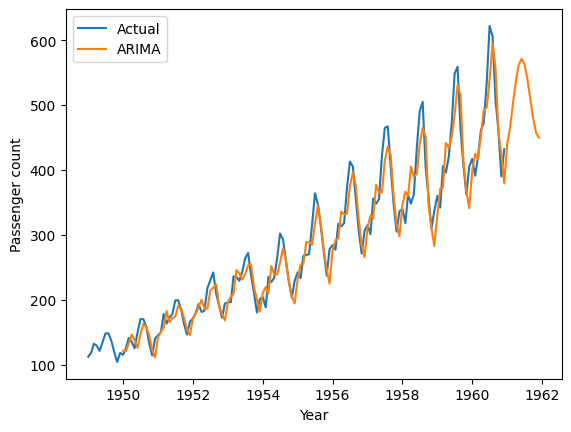

In [45]:
pred = results.predict(start = '1950-01-01', end = '1961-12-01')

plt.plot(data, label = 'Actual')
plt.plot(pred, label = 'ARIMA')

plt.xlabel('Year')
plt.ylabel('Passenger count')
plt.legend()

plt.show()

In [46]:
result

(0.8153688792060441,
 0.9918802434376409,
 13,
 130,
 {'1%': -3.4816817173418295,
  '5%': -2.8840418343195267,
  '10%': -2.578770059171598},
 996.692930839019)